In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from models import ResNet18
import torchvision.transforms as transforms
import torch.nn as nn

In [2]:
checkpoint = torch.load('./checkpoints/ResNet18_200_ckpt.pth',
                        map_location=torch.device('cpu'))
net = ResNet18()
net.load_state_dict(checkpoint['net'])
net.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

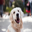

In [3]:
display(Image.open('pexels-svetozar-milashevich.jpg').resize((32, 32)))

In [3]:
dog = Image.open('pexels-svetozar-milashevich.jpg')

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

input_tensor = transform(dog).unsqueeze(0)

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook


net.conv1.register_forward_hook(get_activation('Conv1 Output'))
net.layer1[0].conv1.register_forward_hook(
    get_activation('Layer1 Conv1 Output'))

with torch.no_grad():
    net(input_tensor)

conv1_output = activation['Conv1 Output'].squeeze().cpu()
layer1_conv1_output = activation['Layer1 Conv1 Output'].squeeze().cpu()

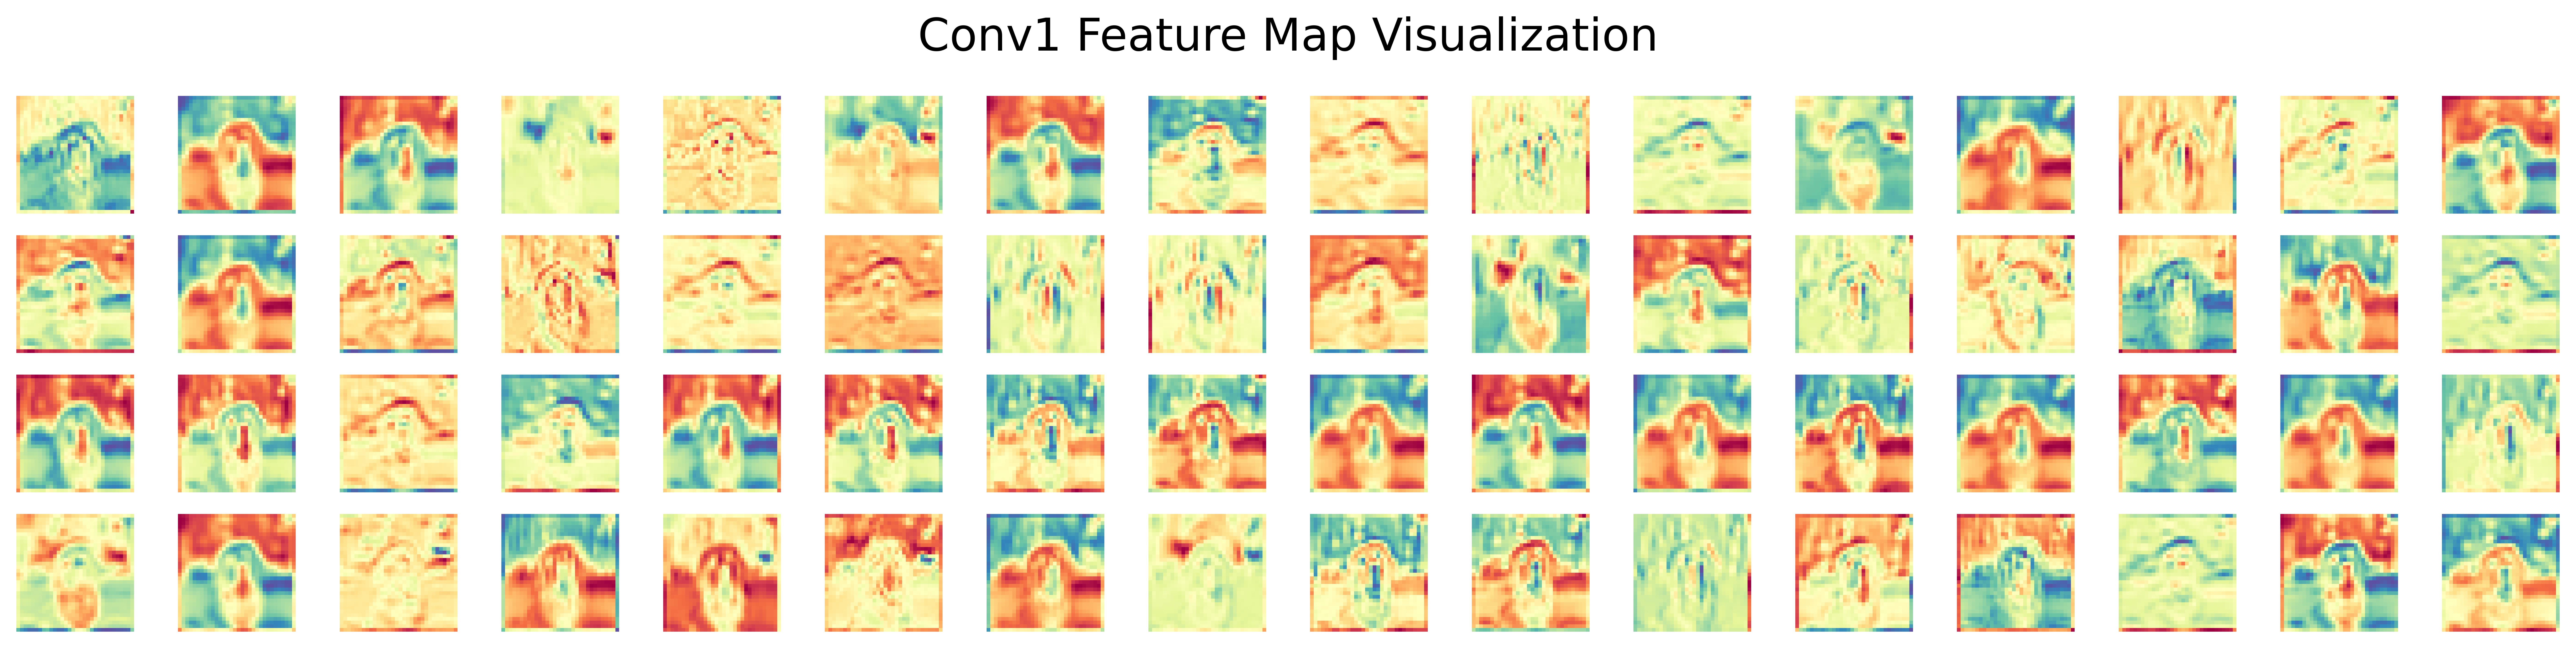

In [4]:
num_channels = conv1_output.shape[0]
plt.figure(figsize=(16, 4), dpi=800)
for i in range(num_channels):
    plt.subplot(4, 16, i+1)
    plt.imshow(conv1_output[i], cmap='Spectral')
    plt.axis('off')

plt.suptitle('Conv1 Feature Map Visualization', fontsize=20)
plt.tight_layout()
plt.show()

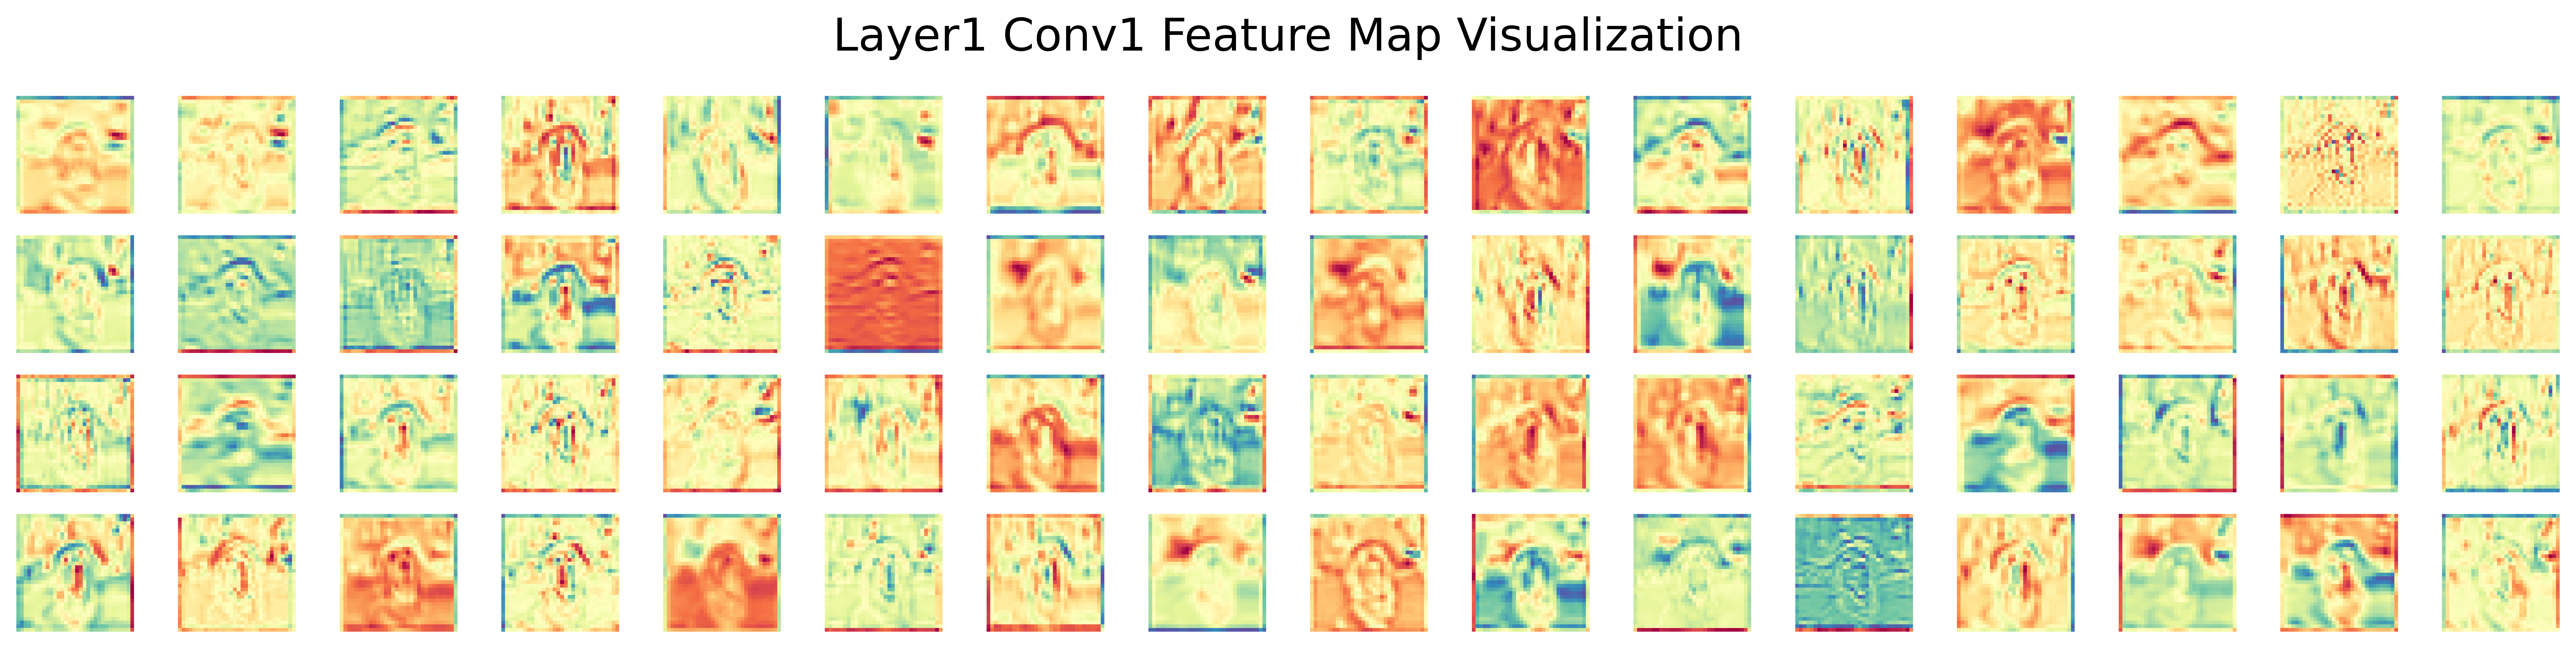

In [5]:
num_channels = layer1_conv1_output.shape[0]
plt.figure(figsize=(16, 4), dpi=800)
for i in range(num_channels):
    plt.subplot(4, 16, i+1)
    plt.imshow(layer1_conv1_output[i], cmap='Spectral')
    plt.axis('off')

plt.suptitle('Layer1 Conv1 Feature Map Visualization', fontsize=20)
plt.tight_layout()
plt.show()